Referencias:  
https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [2]:
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import missingno as msno
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

### 2. EDA

In [3]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv(('./test.csv'))
titanic = pd.concat([train_data, test_data], axis=0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [5]:
titanic.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

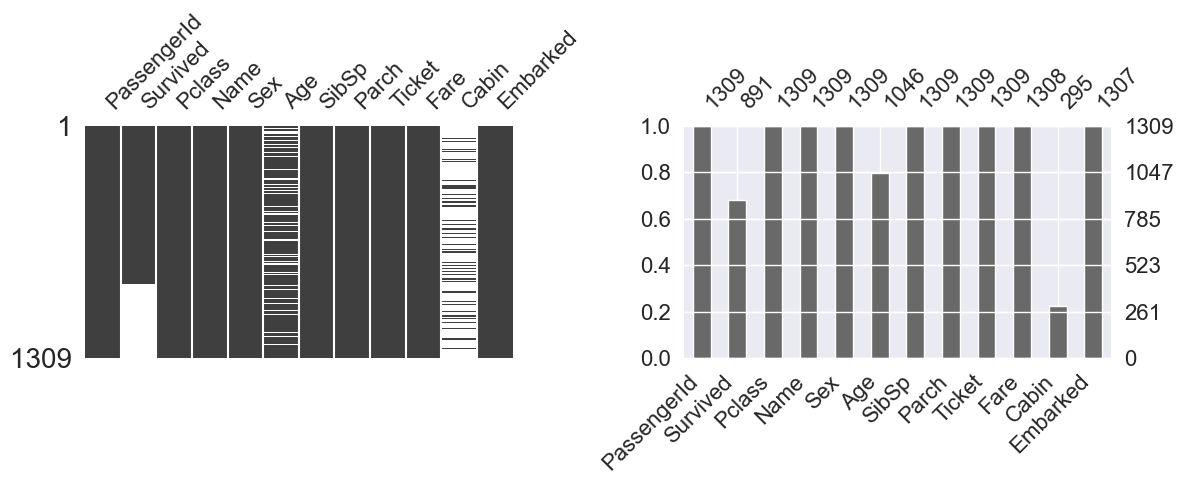

In [6]:
# Crea una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico 1 - msno.matrix
plt.subplot(1, 2, 1)
msno.matrix(titanic, ax=axes[0])

# Grafico 2 - msno.bar
plt.subplot(1, 2, 2)
msno.bar(titanic, ax=axes[1])

# Ajusta los espacios entre los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()


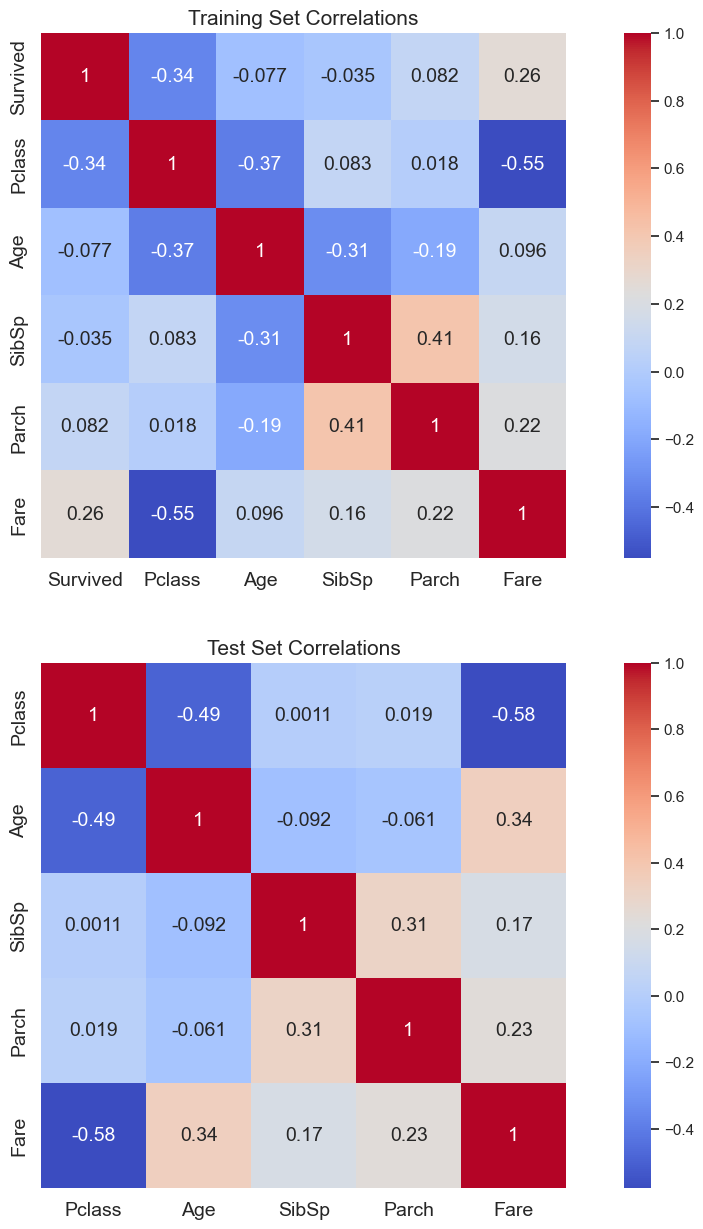

In [7]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))

sns.heatmap(train_data.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(test_data.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

En el código proporcionado, las funciones `size()` y `unstack()` se utilizan para manipular y preparar los datos antes de trazar los gráficos.

1. `size()`: Esta función se aplica a un objeto de grupo generado por `groupby()` y devuelve el tamaño de cada grupo. En el código, se utiliza para calcular el tamaño de cada combinación de categorías en las columnas 'Embarked', 'Pclass' y 'Sex', junto con la columna 'Survived'. Esto proporciona el recuento de registros para cada combinación en el conjunto de datos.

2. `unstack()`: Esta función se aplica a un objeto de Serie o DataFrame y se utiliza para desapilar los niveles internos de un índice jerárquico, convirtiéndolo en un DataFrame más plano. En el código, se aplica después de `size()` para reorganizar los datos de manera que cada categoría de 'Survived' se convierte en una columna separada. Esto permite trazar gráficos de barras con las categorías 'Survived' en el eje x y los recuentos en el eje y.

En resumen, el código realiza los siguientes pasos para cada combinación de categorías en las columnas 'Embarked', 'Pclass' y 'Sex':
- Calcula el tamaño de cada grupo utilizando `size()`.
- Desapila los niveles del índice jerárquico utilizando `unstack()`.
- Genera un gráfico de barras para visualizar los recuentos de cada categoría de 'Survived' utilizando `plot(kind='bar')`.

El resultado es una matriz de tres gráficos de barras, donde cada gráfico muestra la distribución de supervivencia según la categoría especificada ('Embarked', 'Pclass' y 'Sex').

<AxesSubplot: xlabel='Sex'>

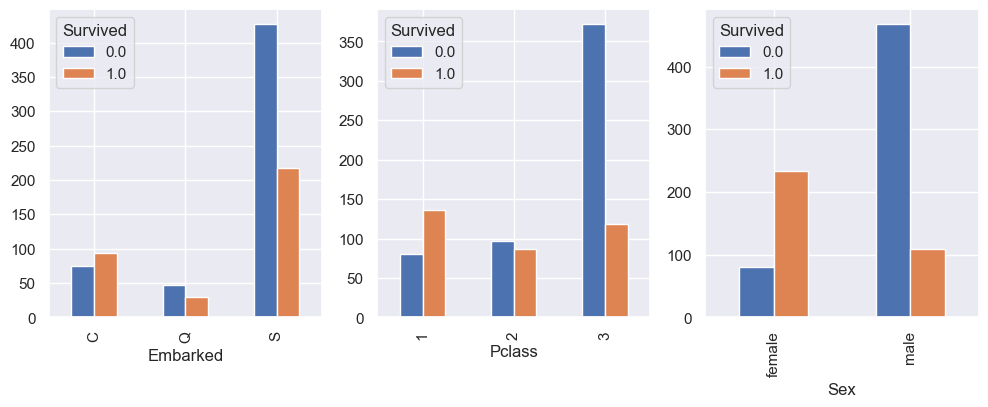

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

titanic.groupby(['Embarked', 'Survived']).size().unstack().plot(kind='bar', ax=axes[0])
titanic.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', ax=axes[1])
titanic.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', ax=axes[2])

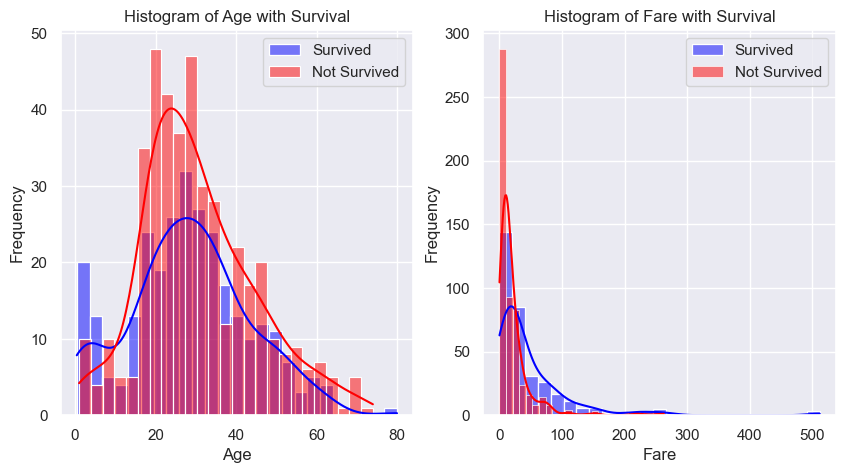

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

survived_data = titanic[titanic['Survived'] == 1]['Age']
not_survived_data = titanic[titanic['Survived'] == 0]['Age']

sns.histplot(survived_data, bins=25, color='blue', label='Survived', kde=True, ax=axes[0])
sns.histplot(not_survived_data, bins=25, color='red', label='Not Survived', kde=True, ax=axes[0])

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Age with Survival')
axes[0].legend()

survived_data = titanic[titanic['Survived'] == 1]['Fare']
not_survived_data = titanic[titanic['Survived'] == 0]['Fare']

sns.histplot(survived_data, bins=25, color='blue', label='Survived', kde=True, ax=axes[1])
sns.histplot(not_survived_data, bins=25, color='red', label='Not Survived', kde=True, ax=axes[1])

axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Fare with Survival')
axes[1].legend()

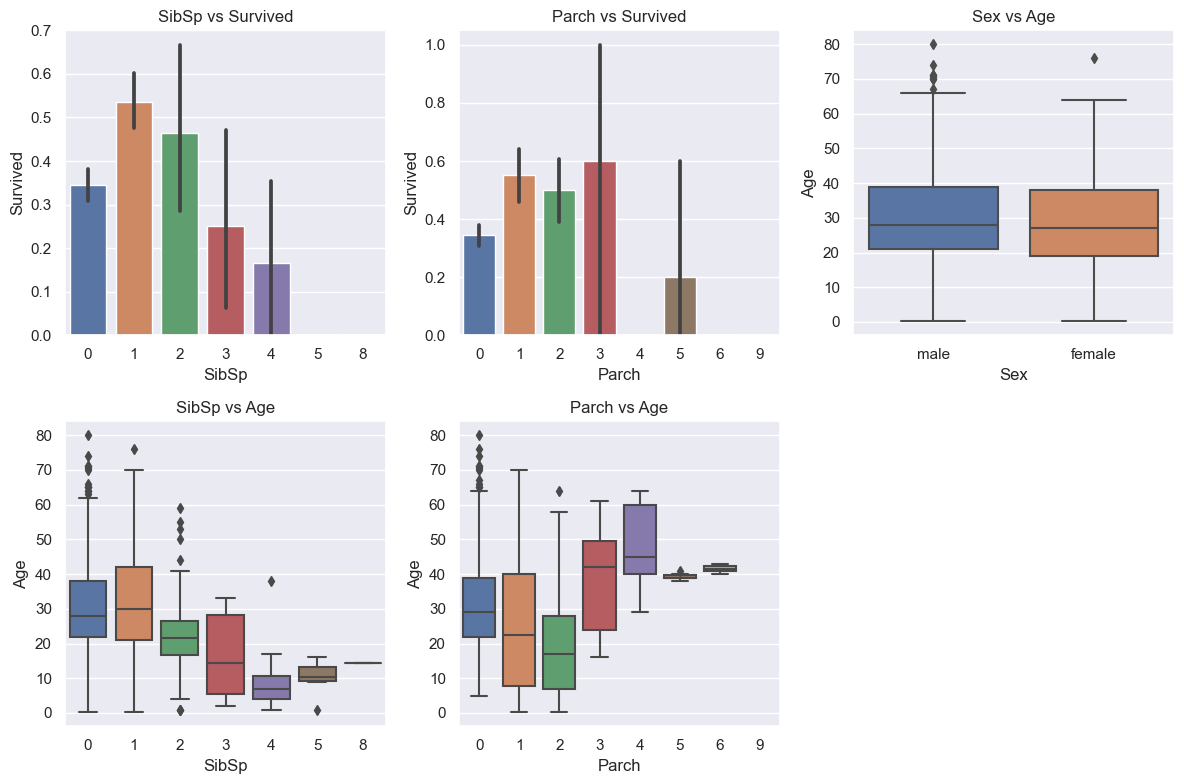

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea la estructura de subplots en una cuadrícula de 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Gráfico 1 - SibSp vs Survived (Barplot)
sns.barplot(data=titanic, x='SibSp', y='Survived', ax=axes[0, 0])
axes[0, 0].set_title("SibSp vs Survived")

# Gráfico 2 - Parch vs Survived (Barplot)
sns.barplot(data=titanic, x='Parch', y='Survived', ax=axes[0, 1])
axes[0, 1].set_title("Parch vs Survived")

# Gráfico 3 - Sex vs Age (Boxplot)
sns.boxplot(data=titanic, x='Sex', y='Age', ax=axes[0, 2])
axes[0, 2].set_title("Sex vs Age")

# Gráfico 4 - SibSp vs Age (Boxplot)
sns.boxplot(data=titanic, x='SibSp', y='Age', ax=axes[1, 0])
axes[1, 0].set_title("SibSp vs Age")

# Gráfico 5 - Parch vs Age (Boxplot)
sns.boxplot(data=titanic, x='Parch', y='Age', ax=axes[1, 1])
axes[1, 1].set_title("Parch vs Age")

# Elimina los subplots no utilizados
axes[1, 2].axis('off')

# Ajusta los espacios entre los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()


### 3. Feature Engineering

#### 3.1 Imputar los MV basado en el sexo y la clase

In [11]:
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

#### 3.2 Embarked, se conoce que la persona abordó en Southampton

In [12]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
titanic['Embarked'].fillna("S", inplace=True)

#### 3.3 Hay un pasajero de tercera clase sin tarifa, se le imputa la tarifa promedio de la clase

In [14]:
titanic[titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [15]:
med_fare = titanic.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
titanic['Fare'] = titanic['Fare'].fillna(med_fare)

#### 3.4 Encontrar 'Deck' desde la variable cabina

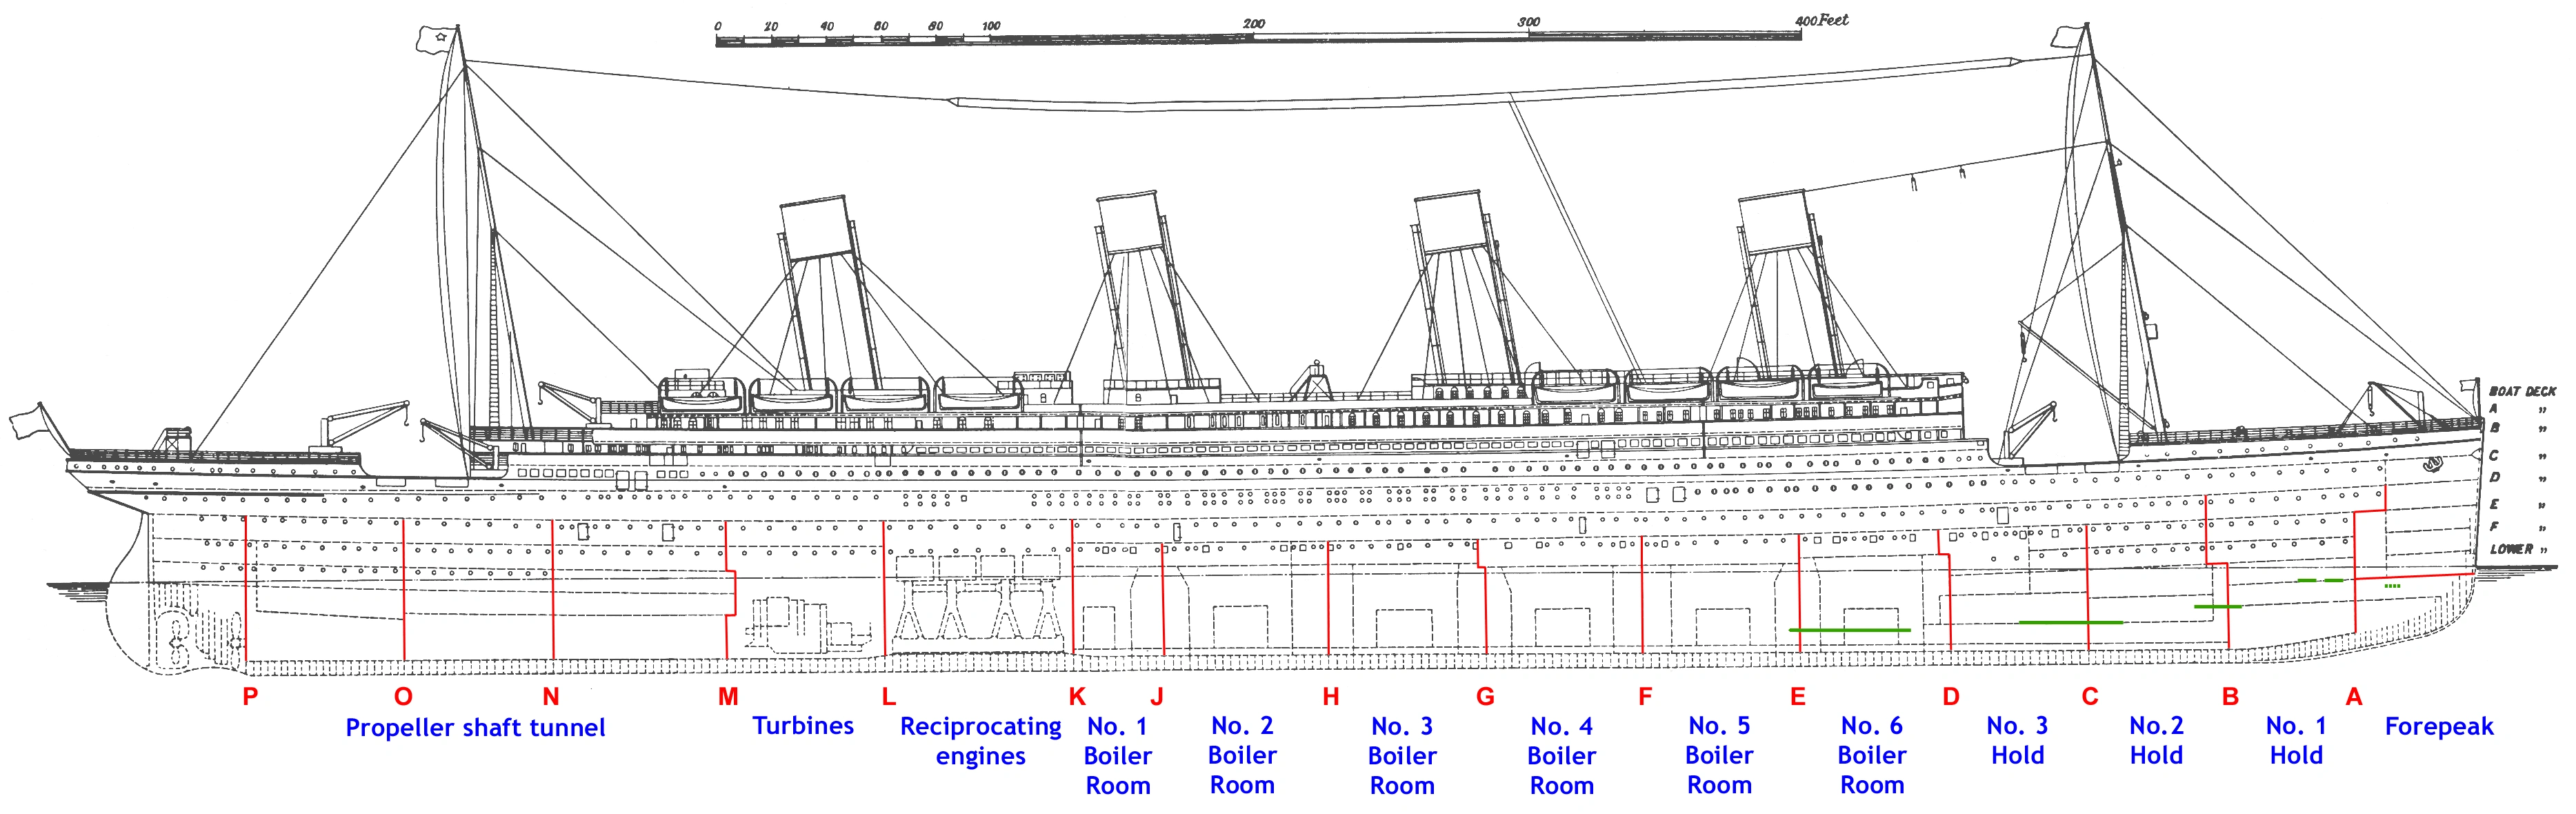

In [16]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
titanic['Deck'] = titanic['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else "M")

Función para visualizar el % de pasajeros por clase en los distintos decks

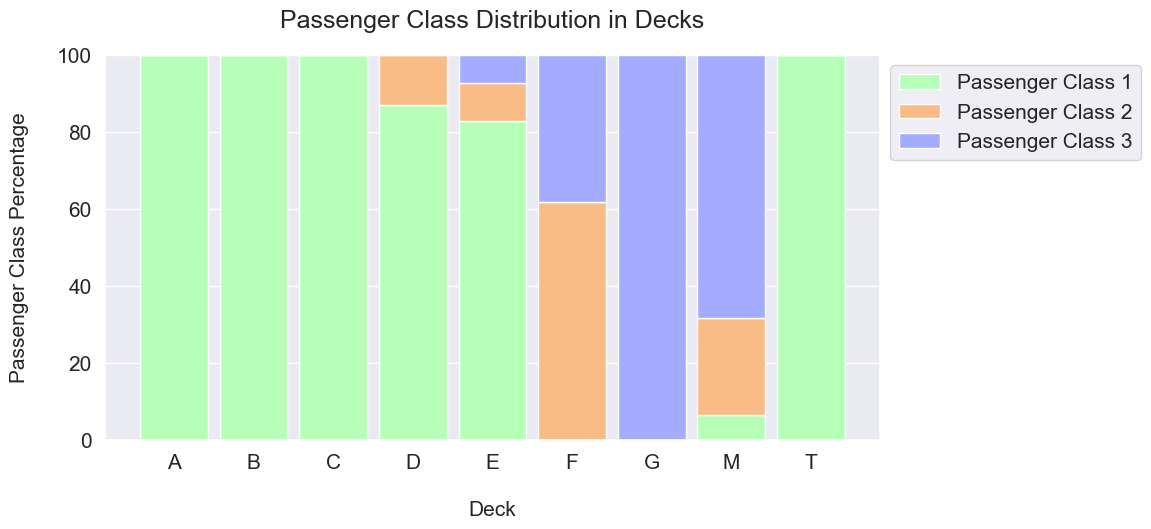

In [17]:
titanic_decks = titanic.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(10, 5))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(titanic_decks)
display_pclass_dist(all_deck_per)

Asignamos el único pasajero en el Deck T al Deck A, pues pertenece a la Clase 1

In [18]:
titanic.query('Deck == "T"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [19]:
# Passenger in the T deck is changed to A
titanic.loc[titanic[titanic['Deck'] == 'T'].index, 'Deck'] = 'A'

Función para visualizar el % de sobrevivencia en cada Deck

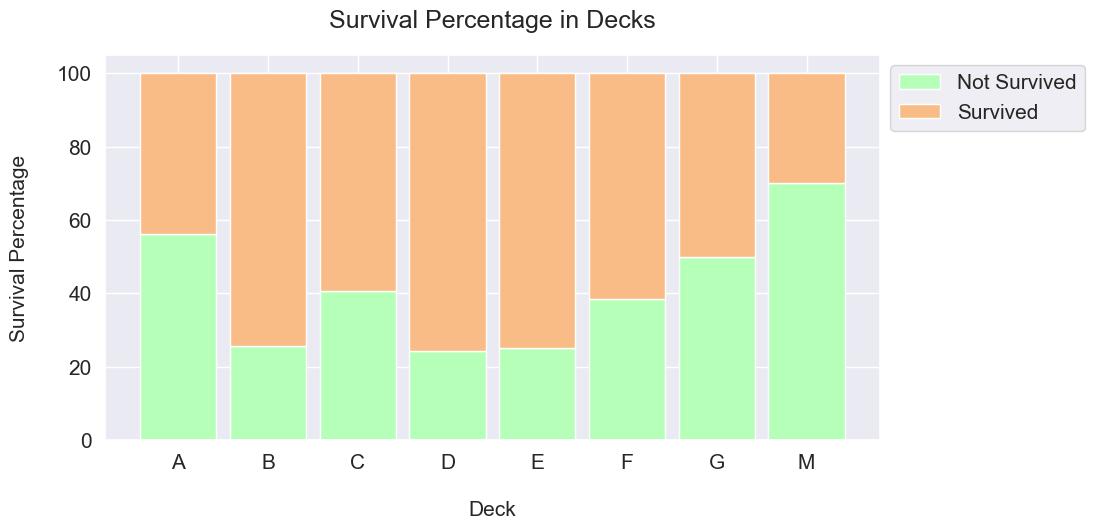

In [20]:
titanic_deck_surv = titanic.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(10, 5))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(titanic_deck_surv)
display_surv_dist(all_surv_per)

* **A**, **B** and **C** decks are labeled as **ABC** because all of them have only 1st class passengers
* **D** and **E** decks are labeled as **DE** because both of them have similar passenger class distribution and same survival rate
* **F** and **G** decks are labeled as **FG** because of the same reason above
* **M** deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

In [21]:
titanic['Deck'] = titanic['Deck'].replace(['A', 'B', 'C'], 'ABC')
titanic['Deck'] = titanic['Deck'].replace(['D', 'E'], 'DE')
titanic['Deck'] = titanic['Deck'].replace(['F', 'G'], 'FG')

titanic['Deck'].value_counts()

M      1013
ABC     183
DE       87
FG       26
Name: Deck, dtype: int64

#### 3.5 Discretizar Fare y Age

In [22]:
titanic['Fare'] = pd.qcut(titanic['Fare'], 13)
titanic['Age'] = pd.qcut(titanic['Age'], 10)

#### 3.6 Tamaño de la familia

In [23]:
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1

In [24]:
# Create new feature of family size
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
titanic['Family_Size_Grouped'] = titanic['Family_Size'].map(family_map)

Countplot del tamaño de la familia

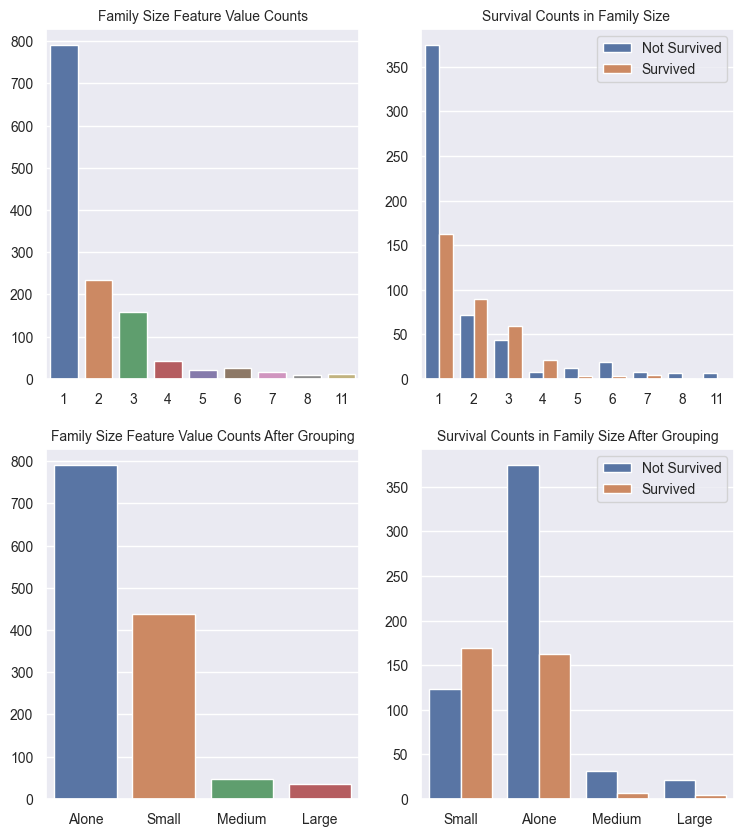

In [25]:
fig, axs = plt.subplots(figsize=(5, 10), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=titanic['Family_Size'].value_counts().index, y=titanic['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=titanic, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=10, y=1)
axs[0][1].set_title('Survival Counts in Family Size ', size=10, y=1)

sns.barplot(x=titanic['Family_Size_Grouped'].value_counts().index, y=titanic['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=titanic, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=10, y=1)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=10, y=1)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 10})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=10)
        axs[i][j].tick_params(axis='y', labelsize=10)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

#### 3.7 Frecuencia del Ticket 
Da cuenta de las personas que compraron el ticket juntas pero no necesariamente son familia

In [26]:
titanic['Ticket_Frequency'] = titanic.groupby('Ticket')['Ticket'].transform('count')

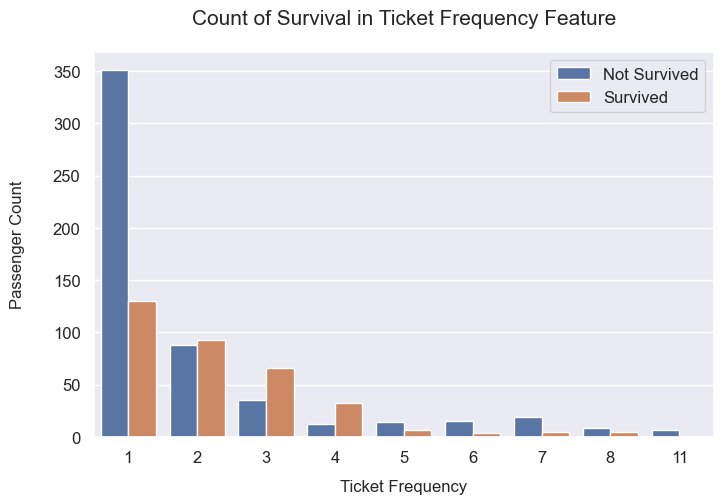

In [27]:
fig, axs = plt.subplots(figsize=(8, 5))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=titanic)

plt.xlabel('Ticket Frequency', size=12, labelpad=10)
plt.ylabel('Passenger Count', size=12, labelpad=20)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

#### 3.8 Título - está casada

Primero se identifican a las mujeres casadas.  
Luego se agrupan todos los títulos femeninos.  
Se identifican títulos de hombres, se destaca Master dado a hombres bajo 26 años

In [28]:
titanic['Title'] = titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
titanic['Is_Married'] = 0
titanic['Is_Married'].loc[titanic['Title'] == 'Mrs'] = 1

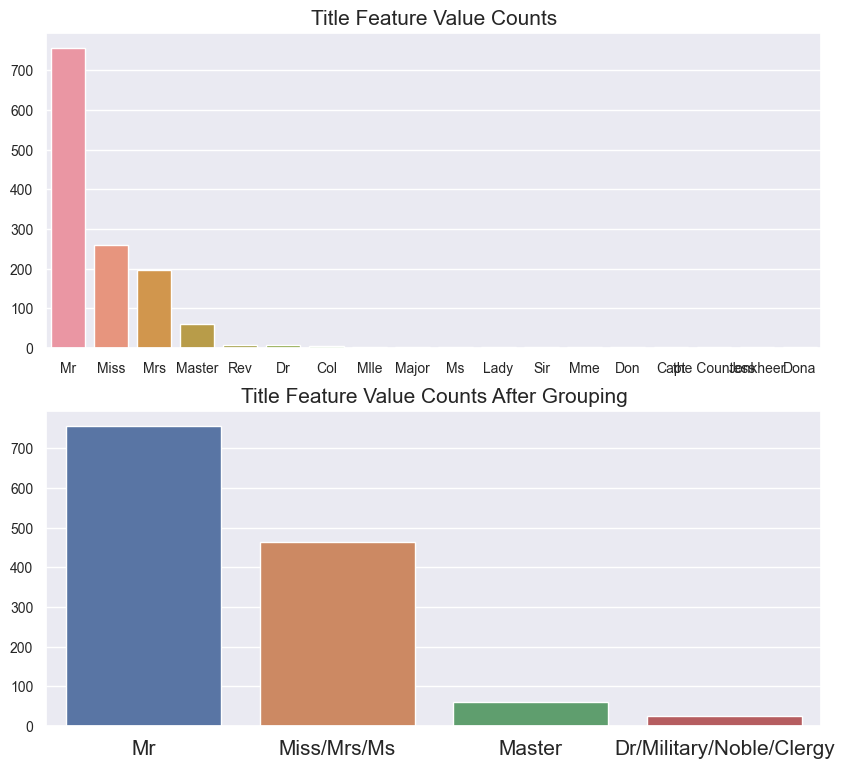

In [29]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 9))
sns.barplot(x=titanic['Title'].value_counts().index, y=titanic['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=10)

axs[0].set_title('Title Feature Value Counts', size=15, y=1)

titanic['Title'] = titanic['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
titanic['Title'] = titanic['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=titanic['Title'].value_counts().index, y=titanic['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=15, y=1)

plt.show()

#### 3.9 Encontrar el apellido

In [30]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

In [31]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
324,1216,NaN,1,"Kreuchen, Miss. Emilie",female,"(34.0, 40.0]",0,0,24160,"(83.475, 512.329]",NaN,S,M,1,Alone,4,Miss/Mrs/Ms,0
635,636,1.0,2,"Davis, Miss. Mary",female,"(26.0, 29.5]",0,0,237668,"(10.5, 13.0]",NaN,S,M,1,Alone,1,Miss/Mrs/Ms,0
381,382,1.0,3,"Nakid, Miss. Maria (""Mary"")",female,"(0.169, 16.0]",0,2,2653,"(13.0, 15.742]",NaN,C,M,3,Small,3,Miss/Mrs/Ms,0
712,713,1.0,1,"Taylor, Mr. Elmer Zebley",male,"(40.0, 48.0]",1,0,19996,"(34.075, 56.496]",C126,S,ABC,2,Small,2,Mr,0
107,999,NaN,3,"Ryan, Mr. Edward",male,"(22.0, 25.0]",0,0,383162,"(7.25, 7.75]",NaN,Q,M,1,Alone,1,Mr,0


In [32]:

titanic['Family'] = extract_surname(titanic['Name'])

In [33]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family
145,146,0.0,2,"Nicholls, Mr. Joseph Charles",male,"(16.0, 21.0]",1,1,C.A. 33112,"(34.075, 56.496]",NaN,S,M,3,Small,4,Mr,0,Nicholls
96,988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,"(48.0, 80.0]",1,0,19877,"(56.496, 83.475]",C46,S,ABC,2,Small,3,Miss/Mrs/Ms,1,Cavendish
130,1022,NaN,3,"Spinner, Mr. Henry John",male,"(29.5, 34.0]",0,0,STON/OQ. 369943,"(7.896, 8.05]",NaN,S,M,1,Alone,1,Mr,0,Spinner
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,"(40.0, 48.0]",0,0,113784,"(34.075, 56.496]",T,S,ABC,1,Alone,1,Mr,0,Blackwell
382,1274,NaN,3,"Risien, Mrs. Samuel (Emma)",female,"(21.0, 22.0]",0,0,364498,"(13.0, 15.742]",NaN,S,M,1,Alone,2,Miss/Mrs/Ms,1,Risien


titanic.sample(5)

#### 3.10 Nuevas features: Family survival rate, Ticket survival rate

Family_Survival_Rate is calculated from families in training set since there is no Survived feature in test set. A list of family names that are occuring in both training and test set (non_unique_families), is created. The survival rate is calculated for families with more than 1 members in that list, and stored in Family_Survival_Rate feature.

An extra binary feature Family_Survival_Rate_NA is created for families that are unique to the test set. This feature is also necessary because there is no way to calculate those families' survival rate. This feature implies that family survival rate is not applicable to those passengers because there is no way to retrieve their survival rate.

Ticket_Survival_Rate and Ticket_Survival_Rate_NA features are also created with the same method.  
Ticket_Survival_Rate and Family_Survival_Rate are averaged and become Survival_Rate, and   
Ticket_Survival_Rate_NA and Family_Survival_Rate_NA are also averaged and become Survival_Rate_NA.

In [34]:
train = titanic[titanic['Survived'].notna()]
test = titanic[titanic['Survived'].isna()]

Crea una lista de familias que se encuentran en el train y test.  
Crea una lista de tickets que se encuentran en el train y test.  
Calcula una tasa de sobrevivencia en base al tamaño del gupo famliar.  
Lo hace para 'Family' y para 'Ticket'

In [35]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in train['Family'].unique() if x in test['Family'].unique()]
non_unique_tickets = [x for x in train['Ticket'].unique() if x in test['Ticket'].unique()]

df_family_survival_rate = train.groupby('Family')['Survived', 'Family', 'Family_Size'].median()
df_ticket_survival_rate = train.groupby('Ticket')['Survived', 'Ticket', 'Ticket_Frequency'].median()

In [36]:
df_family_survival_rate.head(3)

,Survived,Family_Size
Family,,
Abbing,0.0,1.0
Abbott,0.5,3.0
Abelson,0.5,2.0


In [37]:
df_ticket_survival_rate.sample(3)

,Survived,Ticket_Frequency
Ticket,,
347076,0.0,1.0
250644,1.0,2.0
STON/O 2. 3101280,0.0,1.0


In [38]:
family_rates = {}
ticket_rates = {}

# Checking a family exists in both training and test set, and has members more than 1
for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

# Checking a ticket exists in both training and test set, and has members more than 1
for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [39]:
mean_survival_rate = np.mean(train['Survived'])

Family survival rate

In [40]:
train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(train)):
    if train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(test)):
    if test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
train['Family_Survival_Rate'] = train_family_survival_rate
train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
test['Family_Survival_Rate'] = test_family_survival_rate
test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

In [41]:
test['Family_Survival_Rate'].head()

0    0.383838
1    0.383838
2    0.383838
3    0.383838
4    1.000000
Name: Family_Survival_Rate, dtype: float64

Ticket survival rate

In [42]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(train)):
    if train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(test)):
    if test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
train['Ticket_Survival_Rate'] = train_ticket_survival_rate
train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
test['Ticket_Survival_Rate'] = test_ticket_survival_rate
test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

Overall Survival rate

In [43]:
for df in [train, test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2   

### 4. Preprocesamiento

#### 4.1 LabelEncoding

In [44]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare','Is_Married']

for df in [train, test]:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

#### 4.2 OneHot Encoding

In [45]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped','Is_Married']
encoded_features = []

for df in [train, test]:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

In [46]:
train = pd.concat([train, *encoded_features[:7]], axis=1) #concatena las 6 primeras categorías codificadas
test = pd.concat([test, *encoded_features[7:]], axis=1) # contanena las 6 siguientes catergorias codificadas

#### 4.3 Eliminar features irrelevantes

In [47]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'Family_Size',
       'Family_Size_Grouped', 'Ticket_Frequency', 'Title', 'Is_Married',
       'Family'],
      dtype='object')

In [48]:
pd.options.display.max_columns=45


In [49]:
titanic = pd.concat([train, test], sort=True).reset_index(drop=True)

In [50]:
titanic = pd.concat([train, test], sort=True).reset_index(drop=True)
drop_cols = ['Deck', 'Cabin', 'Embarked', 'Family', 'Family_Size',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

titanic.drop(columns=drop_cols, inplace=True)

titanic.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Fare,Is_Married,Is_Married_1,Is_Married_2,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Survived,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,0.0,0.0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.0,0.0,0.0,1.0,11,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.0,0.0,0.0,3,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.383838,0.0,1.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,1.0,10,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.383838,0.0,1.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.0,0.0,0.0,3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0


In [51]:
#Se me olvidó tirar la cabina
titanic.drop(['Family_Size_Grouped_1','Family_Size_Grouped_2','Family_Size_Grouped_3','Family_Size_Grouped_4','Is_Married'], inplace=True, axis=1)

In [52]:
pd.options.display.max_columns=25

In [53]:
titanic.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped,Fare,Is_Married_1,Is_Married_2,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Survived,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,11,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.383838,0.0,1.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,10,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.383838,0.0,1.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0


#### 4.4 Volver a obtener los datos de train y test

In [54]:
train = titanic[titanic['Survived'].notna()]
test = titanic[titanic['Survived'].isna()]

test.drop('Survived', axis=1, inplace=True)

y = train['Survived']
train = train.drop('Survived', axis=1)

#### 4.4 Estandarización

In [55]:
#Cuidado, se debe realizar el escalador debe ser ajustado en los datos de entrenamiento, luego, con esa media y desviación estándar debo estandarizar los datos de test
scaler = StandardScaler()
train_esc = scaler.fit_transform(train)
test_esc = scaler.transform(test)

### 5. Modelamiento

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(train_esc, y, test_size=0.2, random_state=2023)

In [58]:
titanic.value_counts

<bound method DataFrame.value_counts of       Age  Deck_1  Deck_2  Deck_3  Deck_4  Embarked_1  Embarked_2  Embarked_3  \
0       2     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
1       7     1.0     0.0     0.0     0.0         1.0         0.0         0.0   
2       4     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
3       7     1.0     0.0     0.0     0.0         0.0         0.0         1.0   
4       7     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
...   ...     ...     ...     ...     ...         ...         ...         ...   
1304    3     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
1305    7     1.0     0.0     0.0     0.0         1.0         0.0         0.0   
1306    7     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
1307    3     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
1308    3     0.0     0.0     0.0     1.0         1.0         0.0    

In [59]:
y_test

840    0.0
554    1.0
214    0.0
439    0.0
366    1.0
      ... 
130    0.0
628    0.0
451    0.0
612    1.0
542    0.0
Name: Survived, Length: 179, dtype: float64

In [60]:
len(train_esc)

891

In [61]:
#Librerías de keras
import tensorflow as tf
layers = tf.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import SGD #(stochastic gradien descent) 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import L1

In [62]:
#Métricas de predicciones
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [63]:
train_esc.shape[1]

24

In [64]:
# modelo 1
model1 = Sequential()
model1.add(Dense(16, input_shape=(train_esc.shape[1],), kernel_initializer='normal', activation='LeakyReLU'))
model1.add(Dense(128, kernel_initializer='normal', activation='LeakyReLU'))
model1.add(Dropout(0.2))
model1.add(Dense(128, kernel_initializer='normal', activation='LeakyReLU'))
model1.add(Dropout(0.2))
model1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

optimizer = tf.keras.optimizers.Adamax(learning_rate=0.0001)
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 

early_stopping_monitor =  EarlyStopping(patience=10)
history1 = model1.fit(train_esc, y, batch_size=10, epochs=500, verbose=2, validation_split=0.2, callbacks = [early_stopping_monitor])

Epoch 1/500
72/72 - 1s - loss: 0.6914 - accuracy: 0.6671 - val_loss: 0.6886 - val_accuracy: 0.7821 - 1s/epoch - 21ms/step
Epoch 2/500
72/72 - 0s - loss: 0.6874 - accuracy: 0.7486 - val_loss: 0.6835 - val_accuracy: 0.8101 - 200ms/epoch - 3ms/step
Epoch 3/500
72/72 - 0s - loss: 0.6828 - accuracy: 0.7837 - val_loss: 0.6772 - val_accuracy: 0.8156 - 178ms/epoch - 2ms/step
Epoch 4/500
72/72 - 0s - loss: 0.6765 - accuracy: 0.7851 - val_loss: 0.6686 - val_accuracy: 0.8324 - 183ms/epoch - 3ms/step
Epoch 5/500
72/72 - 0s - loss: 0.6673 - accuracy: 0.8132 - val_loss: 0.6573 - val_accuracy: 0.8324 - 185ms/epoch - 3ms/step
Epoch 6/500
72/72 - 0s - loss: 0.6564 - accuracy: 0.8076 - val_loss: 0.6422 - val_accuracy: 0.8380 - 191ms/epoch - 3ms/step
Epoch 7/500
72/72 - 0s - loss: 0.6414 - accuracy: 0.8146 - val_loss: 0.6236 - val_accuracy: 0.8380 - 205ms/epoch - 3ms/step
Epoch 8/500
72/72 - 0s - loss: 0.6245 - accuracy: 0.8160 - val_loss: 0.6011 - val_accuracy: 0.8380 - 191ms/epoch - 3ms/step
Epoch 9/50

### Gridsearch...

In [65]:
#Librerías para la búsqueda randomizada de parámetros
from scipy.stats import reciprocal
from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold

In [66]:
# Función para construir el modelo con los hiperparámetros dados
def build_model(n_hidden=1, n_neurons=10, learning_rate=0.003, l1=0.01, input_dim=24):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=input_dim, kernel_initializer='normal', activation='relu', kernel_regularizer=L1(l1)))
    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu', kernel_regularizer=L1(l1)))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Grilla de parámetros a probar (mantenemos 1 capa oculta y probaremos distintas combinaciones de neuronas, tasa de aprendizaje y regularización)
param_grid ={
    'n_hidden': [1,2],
    'n_neurons': [32, 64, 128],
    'learning_rate': [0.0001, 0.0003, 0.001],
    'l1': [0.01, 0.03, 0.1]
}

# Con RepeatedKFold se realizarán 30 ejecuciones de cada modelo generado por la combinación de parámetros en la grilla
rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=42)

# Crear el modelo
model = KerasClassifier(build_fn=build_model, verbose=1)

# Métricas de evaluación del modelo
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Realizamos la búsqueda exhaustiva de hiperparámetros con EarlyStopping y conjunto de validación (repeticiones)
grid_search = GridSearchCV(model, param_grid, cv=rkf, scoring=scoring, refit='accuracy', n_jobs=-2)

X_train, X_val, y_train, y_val = train_test_split(train_esc, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train, callbacks=[EarlyStopping(monitor='val_loss', patience=10)], epochs=300, batch_size=10, verbose=2)

Epoch 1/300
72/72 - 2s - loss: 2.3907 - accuracy: 0.5632 - 2s/epoch - 25ms/step
Epoch 2/300
72/72 - 0s - loss: 2.0707 - accuracy: 0.6250 - 96ms/epoch - 1ms/step
Epoch 3/300
72/72 - 0s - loss: 1.8079 - accuracy: 0.6236 - 122ms/epoch - 2ms/step
Epoch 4/300
72/72 - 0s - loss: 1.5933 - accuracy: 0.6236 - 111ms/epoch - 2ms/step
Epoch 5/300
72/72 - 0s - loss: 1.4146 - accuracy: 0.6236 - 111ms/epoch - 2ms/step
Epoch 6/300
72/72 - 0s - loss: 1.2613 - accuracy: 0.6236 - 97ms/epoch - 1ms/step
Epoch 7/300
72/72 - 0s - loss: 1.1281 - accuracy: 0.6236 - 101ms/epoch - 1ms/step
Epoch 8/300
72/72 - 0s - loss: 1.0148 - accuracy: 0.6236 - 101ms/epoch - 1ms/step
Epoch 9/300
72/72 - 0s - loss: 0.9195 - accuracy: 0.6236 - 99ms/epoch - 1ms/step
Epoch 10/300
72/72 - 0s - loss: 0.8396 - accuracy: 0.6236 - 103ms/epoch - 1ms/step
Epoch 11/300
72/72 - 0s - loss: 0.7729 - accuracy: 0.6236 - 98ms/epoch - 1ms/step
Epoch 12/300
72/72 - 0s - loss: 0.7167 - accuracy: 0.6236 - 83ms/epoch - 1ms/step
Epoch 13/300
72/72 -

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=3, random_state=42),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023B75CFA6E0>,
             n_jobs=-2,
             param_grid={'l1': [0.01, 0.03, 0.1],
                         'learning_rate': [0.0001, 0.0003, 0.001],
                         'n_hidden': [1, 2], 'n_neurons': [32, 64, 128]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score, zero_division=1),
                      'recall': make_scorer(recall_score)})

In [81]:
#Mejor modelo obtenido
best_model_attributes = grid_search.best_estimator_.__dict__
best_model_attributes

{'build_fn': <function __main__.build_model(n_hidden=1, n_neurons=10, learning_rate=0.003, l1=0.01, input_dim=24)>,
 'sk_params': {'verbose': 1,
  'l1': 0.01,
  'learning_rate': 0.0003,
  'n_hidden': 1,
  'n_neurons': 32},
 'classes_': array([0., 1.]),
 'n_classes_': 2,
 'model': <keras.engine.sequential.Sequential at 0x23b75cfa350>}

In [82]:
#Obtiene los resultados de grid_search
results_df = pd.DataFrame(grid_search.cv_results_)

In [83]:
# Obtener todos los modelos generados por GridSearchCV
all_models = grid_search.cv_results_['params']

# Lista para almacenar los historiales de entrenamiento de cada modelo
all_training_histories = []

# Recorrer cada modelo y obtener su historial de entrenamiento
for params in all_models:
    # Crear el modelo con los hiperparámetros específicos
    model = build_model(**params)
    
    # Ajustar el modelo a tus datos
    history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)], verbose=0)
    
    # Guardar el historial de entrenamiento en la lista
    all_training_histories.append(history)

In [ ]:
# Crear listas para almacenar las métricas finales de validación de cada epoch
last_val_loss = []
last_val_accuracy = []

# Recorrer cada historial de entrenamiento y obtener las métricas finales de validación de cada epoch
for history in all_training_histories:
    # Obtener las métricas finales de validación de cada epoch y agregarlas a la lista
    last_val_loss.append(history.history['val_loss'][-1])
    last_val_accuracy.append(history.history['val_accuracy'][-1])

# Agregar las métricas finales de validación al DataFrame de resultados
results_df['last_val_loss'] = last_val_loss
results_df['last_val_accuracy'] = last_val_accuracy

# Guardar los resultados actualizados en un archivo CSV
results_df.to_csv('grid_search_results_with_metrics.csv', index=False)

# Imprimir el DataFrame con las métricas finales de validación
results_df.head(5)

In [85]:
#Lista con las columnas de interés
columns_of_interest = ['param_n_hidden', 'param_n_neurons', 'param_learning_rate', 'param_l1',
                       'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1',
                       'std_test_accuracy','std_test_precision','std_test_recall','std_test_f1','last_val_loss']

In [86]:
# Obtener un dataframe con los resultados de los modelos.
# En este caso, la combinación de parámetros resultó en 27 modelos.
# 1(n_hidden) x 3(n_neurons)*3(learning_rate) x 3(L1) = 27 modelos  

results_param = results_df[columns_of_interest]

In [109]:
results_param

,param_n_hidden,param_n_neurons,param_learning_rate,param_l1,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,std_test_accuracy,std_test_precision,std_test_recall,std_test_f1,last_val_loss
0,1,32,0.0001,0.01,0.845222,0.827856,0.744595,0.782603,0.015831,0.038382,0.043147,0.024510,2.309026
1,1,64,0.0001,0.01,0.800952,0.858326,0.598684,0.625752,0.086664,0.081267,0.301654,0.313614,4.919136
2,1,128,0.0001,0.01,0.639161,0.990811,0.048060,0.052348,0.064159,0.034543,0.179838,0.195888,11.687355
3,2,32,0.0001,0.01,0.631878,0.993684,0.025413,0.026190,0.046816,0.034012,0.136851,0.141040,3.773968
4,2,64,0.0001,0.01,0.623580,1.000000,0.000000,0.000000,0.031942,0.000000,0.000000,0.000000,8.751237
5,2,128,0.0001,0.01,0.623580,1.000000,0.000000,0.000000,0.031942,0.000000,0.000000,0.000000,21.830656
6,1,32,0.0003,0.01,0.848731,0.834107,0.748450,0.787589,0.018664,0.045250,0.039672,0.026660,1.936749
7,1,64,0.0003,0.01,0.763165,0.892131,0.473435,0.497020,0.114161,0.091729,0.361481,0.378739,3.637100
8,1,128,0.0003,0.01,0.677362,0.947687,0.199610,0.206356,0.105133,0.088181,0.332181,0.342586,7.266706
9,2,32,0.0003,0.01,0.623580,1.000000,0.000000,0.000000,0.031942,0.000000,0.000000,0.000000,3.011429


In [88]:
best_model= grid_search.best_estimator_.model

In [103]:
early_stopping_monitor =  EarlyStopping(patience=10)
history2 = best_model.fit(train_esc, y, batch_size=10, epochs=500, verbose=2, validation_split=0.2)

Epoch 1/500


72/72 - 0s - loss: 0.3924 - accuracy: 0.8483 - val_loss: 0.3226 - val_accuracy: 0.9106 - 196ms/epoch - 3ms/step
Epoch 2/500
72/72 - 0s - loss: 0.3920 - accuracy: 0.8525 - val_loss: 0.3235 - val_accuracy: 0.9106 - 137ms/epoch - 2ms/step
Epoch 3/500
72/72 - 0s - loss: 0.3916 - accuracy: 0.8497 - val_loss: 0.3232 - val_accuracy: 0.9106 - 109ms/epoch - 2ms/step
Epoch 4/500
72/72 - 0s - loss: 0.3915 - accuracy: 0.8525 - val_loss: 0.3227 - val_accuracy: 0.9106 - 120ms/epoch - 2ms/step
Epoch 5/500
72/72 - 0s - loss: 0.3914 - accuracy: 0.8483 - val_loss: 0.3230 - val_accuracy: 0.9106 - 123ms/epoch - 2ms/step
Epoch 6/500
72/72 - 0s - loss: 0.3916 - accuracy: 0.8511 - val_loss: 0.3228 - val_accuracy: 0.9106 - 116ms/epoch - 2ms/step
Epoch 7/500
72/72 - 0s - loss: 0.3913 - accuracy: 0.8497 - val_loss: 0.3227 - val_accuracy: 0.9106 - 109ms/epoch - 2ms/step
Epoch 8/500
72/72 - 0s - loss: 0.3916 - accuracy: 0.8483 - val_loss: 0.3228 - val_accuracy: 0.9106 - 111ms/epoch - 2ms/step
Epoch 9/500
72/72 - 

In [114]:
threshold = 0.5
y_pred = best_model.predict(X_val)

y_pred_bin = (y_pred >= threshold).astype(int)
print(grid_search.best_params_)
print(classification_report(y_val, y_pred_bin))
print(confusion_matrix(y_val, y_pred_bin))

6/6 [==============================] - 0s 2ms/step
{'l1': 0.01, 'learning_rate': 0.0003, 'n_hidden': 1, 'n_neurons': 32}
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       105
         1.0       0.87      0.81      0.84        74

    accuracy                           0.87       179
   macro avg       0.87      0.86      0.87       179
weighted avg       0.87      0.87      0.87       179

[[96  9]
 [14 60]]


In [113]:
#Guardar modelo
best_model.save('prueba_grid_best_model.h5')

In [67]:
print(X_val.shape) 
print(y_val.shape)

(179, 24)
(179,)


In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import L1
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score
import tensorflow as tf

# Definir la función para construir el modelo 
def build_model():
    model = Sequential()
    model.add(Dense(16, input_shape=(train_esc.shape[1],), kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adamax(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Crear el modelo
model = KerasClassifier(build_fn=build_model, epochs=200, batch_size=16, verbose=2)

# Definir RepeatedKFold
rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=42)

# Realizar validación cruzada repetida
results = cross_val_score(model, train_esc, y, cv=rkf, n_jobs=-1, scoring='accuracy')

print("Results:", results)
print("Mean Accuracy:", results.mean())
print("Standard Deviation:", results.std())


Results: [0.83501684 0.86531987 0.82491582 0.82154882 0.84848485 0.86868687
 0.85521886 0.82828283 0.85185185 0.82154882 0.85858586 0.84175084
 0.83838384 0.84848485 0.83501684 0.84511785 0.85858586 0.85858586
 0.84511785 0.82828283 0.84511785 0.84175084 0.86868687 0.83501684
 0.86531987 0.84848485 0.82828283 0.85858586 0.84175084 0.84175084]
Mean Accuracy: 0.8451178451178449
Standard Deviation: 0.013663010364564035


In [90]:
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

In [115]:
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

In [116]:
epochs = list(range(1, len(train_loss) + 1))

Text(0.5, 1.0, 'Pérdida')

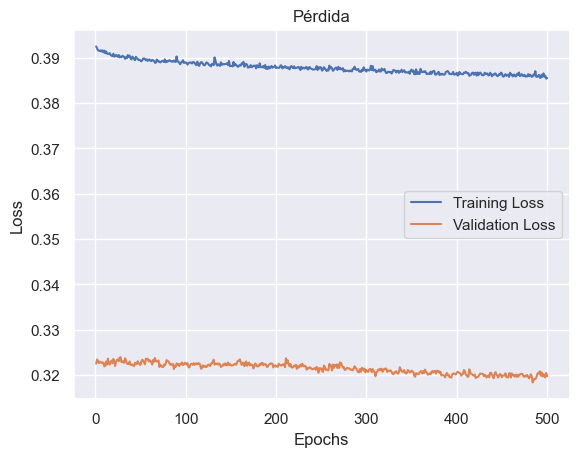

In [117]:
#Plotear la función de pérdida de entrenamiento y validación

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Pérdida')

In [108]:
val_loss[-1]

0.3197787404060364

In [72]:
threshold = 0.5
y_pred = model1.predict(X_test)

y_pred_bin = (y_pred >= threshold).astype(int)

print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       113
         1.0       0.86      0.77      0.82        66

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179

[[105   8]
 [ 15  51]]


Predicciones sobre los datos de prueba

In [118]:
# Hacer predicciones en el conjunto de prueba con el modelo ensamblado 1
threshold = 0.5
y_pred = best_model.predict(test_esc)

y_pred_bin = (y_pred >= threshold).astype(int)

14/14 [==============================] - 0s 1ms/step


In [119]:
y_pred_bin = pd.DataFrame(y_pred_bin)
columnas = ['Survived']
y_pred_bin.columns = columnas

In [120]:
y_pred_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int32
dtypes: int32(1)
memory usage: 1.8 KB


In [121]:
y_pred_bin.value_counts()

Survived
0           256
1           162
dtype: int64

In [122]:
test_data = pd.read_csv('./test.csv')
id = pd.DataFrame(test_data['PassengerId'])

In [123]:
predic = pd.concat([id, y_pred_bin], axis=1)

In [79]:
predic

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [124]:
predic.to_csv('submission_CL_21.csv', index=False)